In [1]:
from kennard_stone import train_test_split
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import seaborn as sns


/Users/yu9824/miniforge3/envs/kennard-stone/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = load_diabetes(as_frame=True)
X = data.data
y = data.target
display(X.head(), y.to_frame().head())


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, n_jobs=-1, metric="euclidean"
)


In [4]:
X_train


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
224,-0.027310,-0.044642,-0.066563,-0.112400,-0.049727,-0.041397,0.000779,-0.039493,-0.035817,-0.009362
12,0.016281,-0.044642,-0.028840,-0.009113,-0.004321,-0.009769,0.044958,-0.039493,-0.030751,-0.042499
300,0.016281,-0.044642,0.073552,-0.041247,-0.004321,-0.013527,-0.013948,-0.001116,0.042896,0.044485
164,0.045341,-0.044642,-0.019140,0.021872,0.027326,-0.013527,0.100183,-0.039493,0.017763,-0.013504
363,-0.049105,0.050680,-0.024529,0.000068,-0.046975,-0.028245,-0.065491,0.028405,0.019199,0.011349
...,...,...,...,...,...,...,...,...,...,...
261,0.048974,-0.044642,-0.041774,0.104501,0.035582,-0.025739,0.177497,-0.076395,-0.012908,0.015491
11,0.027178,0.050680,0.017506,-0.033214,-0.007073,0.045972,-0.065491,0.071210,-0.096433,-0.059067
350,-0.027310,0.050680,0.060618,0.107944,0.012191,-0.017598,-0.002903,-0.002592,0.070211,0.135612
425,-0.078165,-0.044642,-0.040696,-0.081414,-0.100638,-0.112795,0.022869,-0.076395,-0.020289,-0.050783


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, n_jobs=-1, metric="mahalanobis"
)


In [6]:
X_train


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
388,0.052606,0.050680,-0.024529,0.056301,-0.007073,-0.005072,-0.021311,-0.002592,0.026714,-0.038357
267,0.059871,-0.044642,-0.000817,-0.084857,0.075484,0.079478,0.004460,0.034309,0.023375,0.027917
19,-0.027310,-0.044642,-0.018062,-0.040099,-0.002945,-0.011335,0.037595,-0.039493,-0.008944,-0.054925
128,-0.052738,-0.044642,-0.062252,-0.026328,-0.005697,-0.005072,0.030232,-0.039493,-0.030751,-0.071494
20,-0.049105,-0.044642,-0.056863,-0.043542,-0.045599,-0.043276,0.000779,-0.039493,-0.011901,0.015491
...,...,...,...,...,...,...,...,...,...,...
110,0.041708,0.050680,-0.032073,-0.022885,-0.049727,-0.040144,0.030232,-0.039493,-0.126097,0.015491
58,0.041708,-0.044642,-0.064408,0.035644,0.012191,-0.057994,0.181179,-0.076395,-0.000609,-0.050783
141,-0.027310,-0.044642,0.047685,-0.046985,0.034206,0.057245,-0.080217,0.130252,0.045066,0.131470
384,0.034443,0.050680,-0.029918,0.004658,0.093372,0.086994,0.033914,-0.002592,0.024053,-0.038357


<AxesSubplot:>

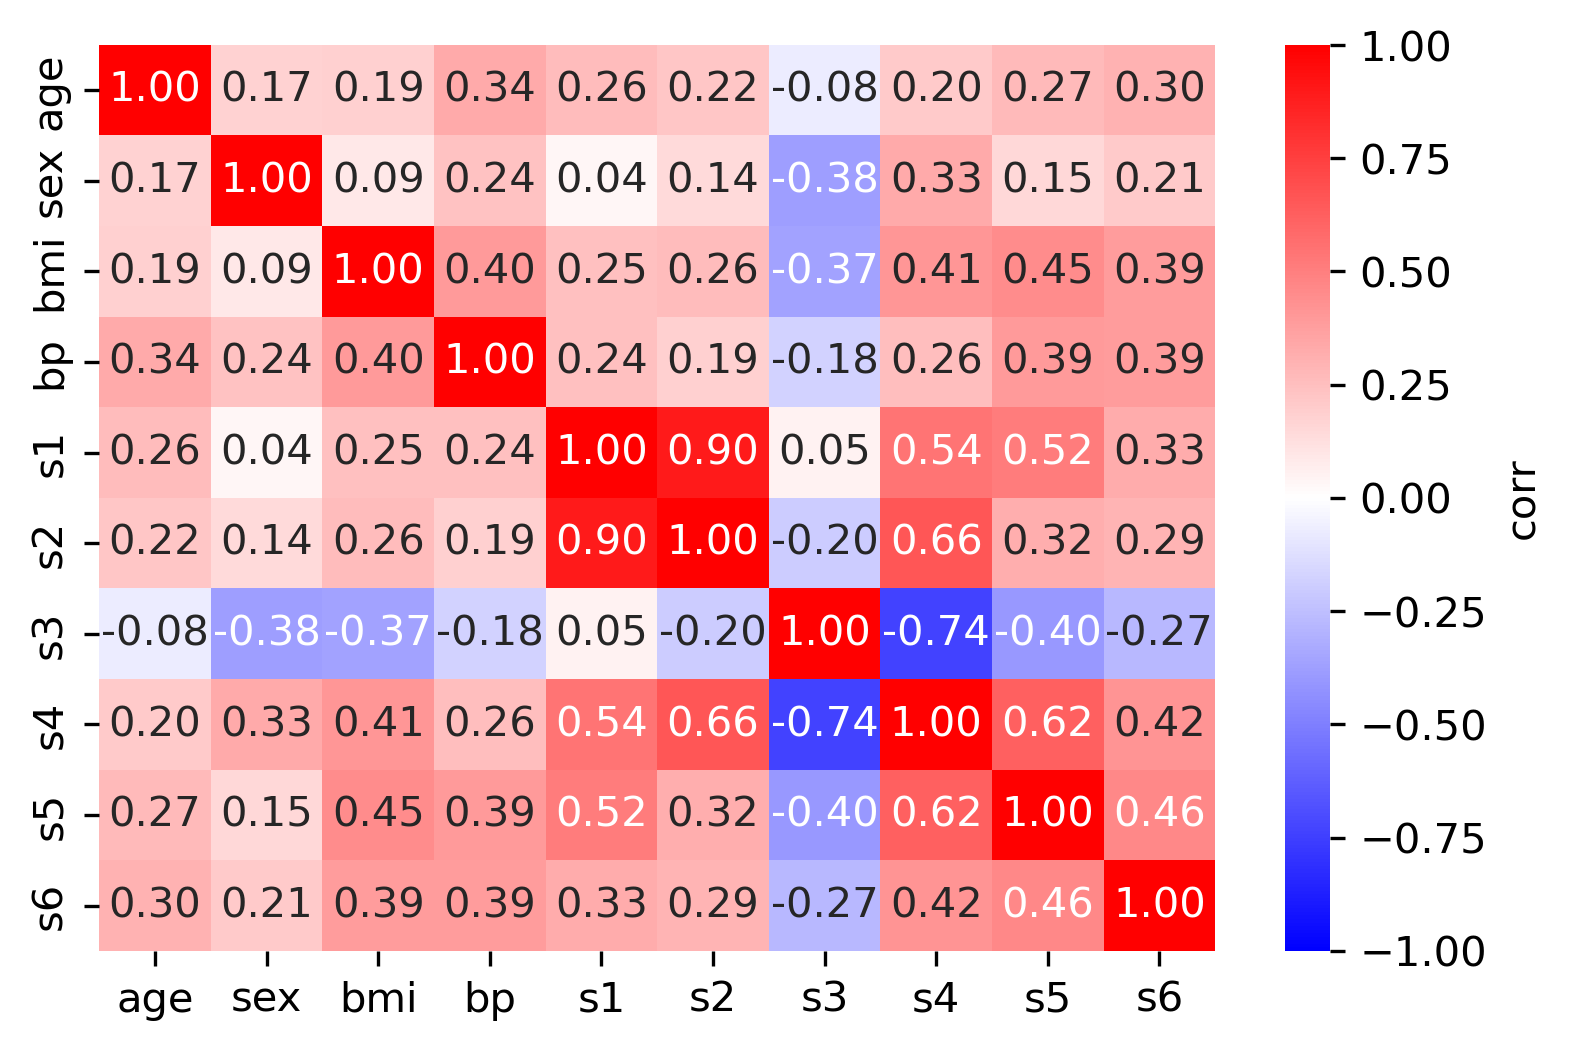

In [7]:
fig, ax = plt.subplots(dpi=300)
sns.heatmap(
    X.corr(),
    vmax=1,
    vmin=-1,
    cbar_kws=dict(label="corr"),
    cmap="bwr",
    annot=True,
    fmt=".2f",
    ax=ax,
)
